##Objective : 

Build a Machine Learning Model which can predict class between 0 and 1

##Exploratory Data Analysis

### Overview

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import numpy as np
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, mutual_info_classif

In [ ]:
#Loading Dataset using pandas
                         
df = pd.read_csv('training_set.csv', index_col=0)       
test = pd.read_csv('test_set.csv', index_col=0)
# Sepearating Dependent Variable from the Dataset

y = df.Y                                                
df.drop(['Y'], axis=1, inplace=True)                                  

In [ ]:
# Displaying first five datapoints
df.head()                                                

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57
0,0.00,0.00,4.34,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000,0.0,1.342,0.000,0.000,1.200,2,12
1,0.00,0.56,0.56,0.00,1.12,0.56,2.25,0.00,0.0,0.56,0.0,0.56,0.0,0.00,0.0,0.00,0.00,0.56,3.38,0.0,1.12,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.56,0.0,0.0,0.0,0.0,0.083,0.0,0.503,0.000,0.083,16.304,148,375
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.00,0.00,0.00,8.10,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.70,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.000,0.000,1.000,1,5
3,0.64,0.00,0.64,0.00,1.93,0.00,0.00,0.00,0.0,0.00,0.0,1.29,0.0,0.00,0.0,1.29,0.64,0.00,1.93,0.0,2.58,0.0,0.64,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000,0.0,0.462,0.370,0.000,2.440,22,122
4,0.58,0.00,0.00,35.46,0.58,0.00,0.58,0.58,0.0,0.00,0.0,0.00,0.0,0.58,0.0,0.58,0.58,0.58,0.58,0.0,1.74,0.0,0.00,1.16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000,0.0,0.239,0.239,0.000,3.338,123,207


In [ ]:
# Displaying first five datapoints
test.head()                                                

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57
0,0.70,0.0,0.70,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.83,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.41,1.41,0.0,0.0,0.0,0.000,0.0,0.105,0.000,0.000,2.342,47,89
1,0.00,0.0,0.84,0.0,0.84,0.00,0.84,0.00,0.00,0.00,0.00,0.00,0.84,0.00,0.00,0.00,0.00,0.00,2.54,0.0,1.69,0.0,0.00,0.84,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.388,0.0,0.776,0.129,0.000,10.375,168,249
2,0.46,0.3,0.46,0.0,0.05,0.12,0.05,0.28,0.43,0.74,0.25,0.97,0.56,1.23,0.00,0.25,0.43,0.02,3.22,0.0,1.46,0.0,1.05,0.36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.02,0.00,0.0,0.0,0.0,0.065,0.0,0.325,0.756,0.153,5.891,193,3040
3,0.10,0.2,1.01,0.0,0.80,0.80,0.50,0.00,0.80,0.10,0.30,0.70,0.30,0.00,1.61,0.10,0.00,1.11,1.31,0.2,0.70,0.0,0.60,0.10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.2,0.0,0.10,0.10,0.0,0.0,0.0,0.110,0.0,0.490,0.158,0.015,8.550,669,1351
4,0.00,0.0,0.72,0.0,0.72,0.00,0.72,0.00,0.00,0.00,0.00,0.00,0.72,0.00,0.00,0.00,0.00,0.00,1.45,0.0,1.45,0.0,0.00,0.72,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.364,0.0,0.729,0.121,0.000,7.781,32,249


In [ ]:
# Displaying last 5 datapoints
df.tail()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57
3905,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,7.31,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.000,0.0,0.000,0.000,0.000,1.714,4,12
3906,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,18.18,9.09,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.000,0.0,0.000,0.000,0.000,2.000,3,4
3907,0.12,0.0,0.12,0.0,0.0,0.25,0.0,0.00,0.00,0.0,0.00,0.12,0.25,0.0,0.00,0.12,0.00,0.00,2.19,0.0,0.51,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0,0.64,0.25,0.12,0.0,0.0,0.0,0.093,0.0,0.023,0.000,0.000,1.247,5,131
3908,0.00,0.0,0.00,0.0,0.0,0.00,0.0,3.12,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,1.04,0.00,0.0,0.0,0.0,0.198,0.0,0.198,0.198,0.000,3.857,25,81
3909,0.96,0.0,0.48,0.0,0.0,0.96,0.0,0.00,0.48,0.0,0.48,0.00,0.00,0.0,1.44,0.48,0.48,2.41,0.00,0.0,0.96,0.0,0.0,0.48,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.48,0.0,0.0,0.0,0.818,0.0,0.175,0.467,0.116,9.560,259,717


In [ ]:
# Number or datapoints and features of datasets
print(df.shape)
print(test.shape)

(3910, 57)
(691, 57)


In [ ]:
df.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11',
       'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21',
       'X22', 'X23', 'X24', 'X25', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31',
       'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41',
       'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51',
       'X52', 'X53', 'X54', 'X55', 'X56', 'X57'],
      dtype='object')

In [ ]:
# Number of Duplicates Record

print(df.duplicated().sum())
print(test.duplicated().sum())

299
30


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3910 entries, 0 to 3909
Data columns (total 57 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      3910 non-null   float64
 1   X2      3910 non-null   float64
 2   X3      3910 non-null   float64
 3   X4      3910 non-null   float64
 4   X5      3910 non-null   float64
 5   X6      3910 non-null   float64
 6   X7      3910 non-null   float64
 7   X8      3910 non-null   float64
 8   X9      3910 non-null   float64
 9   X10     3910 non-null   float64
 10  X11     3910 non-null   float64
 11  X12     3910 non-null   float64
 12  X13     3910 non-null   float64
 13  X14     3910 non-null   float64
 14  X15     3910 non-null   float64
 15  X16     3910 non-null   float64
 16  X17     3910 non-null   float64
 17  X18     3910 non-null   float64
 18  X19     3910 non-null   float64
 19  X20     3910 non-null   float64
 20  X21     3910 non-null   float64
 21  X22     3910 non-null   float64
 22  

In [ ]:
test.isnull().sum()

X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
X24    0
X25    0
X26    0
X27    0
X28    0
X29    0
X30    0
X31    0
X32    0
X33    0
X34    0
X35    0
X36    0
X37    0
X38    0
X39    0
X40    0
X41    0
X42    0
X43    0
X44    0
X45    0
X46    0
X47    0
X48    0
X49    0
X50    0
X51    0
X52    0
X53    0
X54    0
X55    0
X56    0
X57    0
dtype: int64

In [ ]:
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57
count,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000,3910.000000
mean,0.102990,0.206419,0.284419,0.062074,0.311309,0.095974,0.112320,0.106041,0.091146,0.244345,0.060808,0.553685,0.094113,0.057205,0.048545,0.246598,0.142780,0.185514,1.660939,0.083880,0.818253,0.112113,0.101343,0.095199,0.565790,0.266668,0.757120,0.125312,0.100320,0.105274,0.065859,0.046563,0.094281,0.047409,0.108414,0.094258,0.134980,0.013463,0.080286,0.065077,0.044959,0.139182,0.047609,0.081987,0.313151,0.182662,0.006054,0.033281,0.037493,0.139252,0.015876,0.272971,0.077820,0.043828,5.047150,52.338107,283.059079
std,0.296322,1.253828,0.504352,1.369361,0.656195,0.261455,0.389516,0.398694,0.271417,0.667065,0.203018,0.876412,0.303433,0.307892,0.255293,0.799327,0.444164,0.526497,1.760214,0.439199,1.210078,0.990195,0.345887,0.443482,1.733593,0.892676,3.321562,0.545827,0.608313,0.464483,0.409316,0.321900,0.538145,0.322958,0.551546,0.395220,0.409085,0.215280,0.423936,0.346739,0.375329,0.800478,0.231074,0.652636,1.063868,0.944817,0.081662,0.301611,0.235054,0.276309,0.083600,0.858634,0.256991,0.452862,31.397035,204.445218,578.339858
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.580750,6.000000,35.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.140000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.310000,0.000000,0.235000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066000,0.000000,0.000000,0.000000,0.000000,2.263500,15.000000,94.000000
75%,0.000000,0.000000,0.430000,0.000000,0.387500,0.000000,0.000000,0.000000,0.000000,0.170000,0.000000,0.820000,0.000000,0.000000,0.000000,0.110000,0.000000,0.000000,2.637500,0.000000,1.270000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.120000,0.000000,0.000000,0.000000,0.000000,0.188000,0.000000,0.317250,0.054000,0.000000,3.7

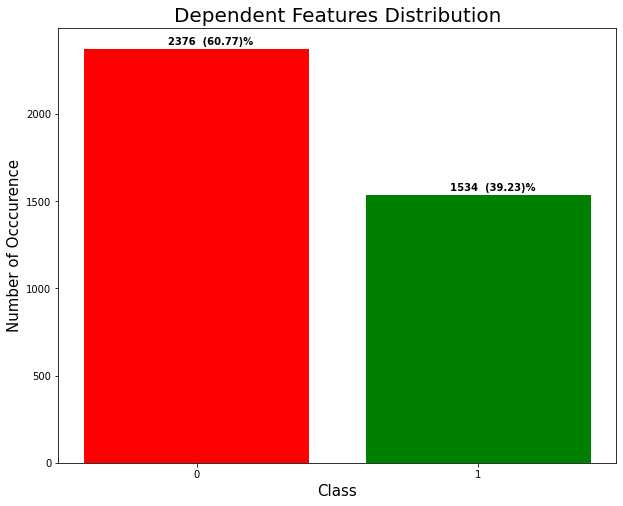

In [ ]:
figure(figsize=(10, 8))
arr=y.value_counts()
plt.bar(['0', '1'], [arr[0], arr[1]], color=['r','g'])
for index, value in enumerate(arr.values):
    plt.text(index-0.1, value+25, str(value)+'  (' +str(np.round(value/df.shape[0]*100,2))+')%', fontweight='bold')
plt.xlabel('Class',fontsize=15)
plt.ylabel('Number of Occcurence', fontsize=15)
plt.title('Dependent Features Distribution', fontsize=20)
plt.show()

**Observations** : 
1. Dataset Contains **3910** records and **58** features.
2. **299 (7.65%)** records are dupliactes. 
3. All features are **Numberical Features**.
4. No missing record found.
5. Most of elemenat are 0.
6. Dataset is Slightly imbalanced.  

###Univariate Analysis

For Univariate Aalysis we will use **Violin Plot** which will give information about the distribution and IQR and spread of the features.

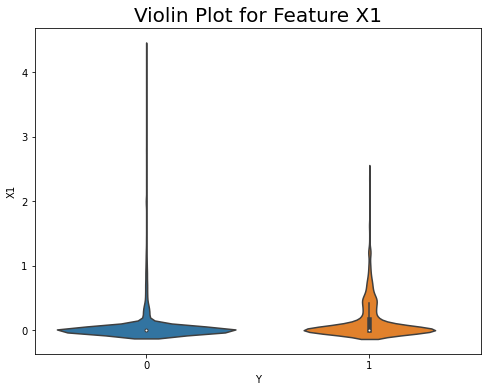

Basic Information about feature X1
Number of Zeros in X1 : 3017
Zero's Percentage in X1 : 77.16%
count    3910.000000
mean        0.102990
std         0.296322
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         4.340000
Name: X1, dtype: float64


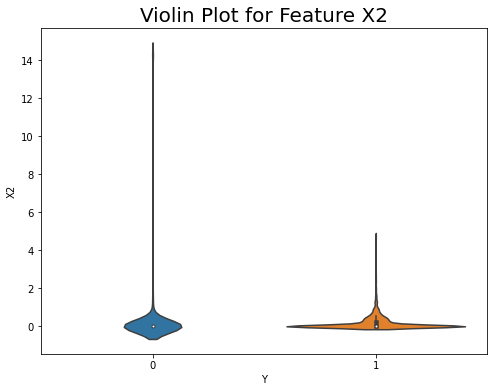

Basic Information about feature X2
Number of Zeros in X2 : 3146
Zero's Percentage in X2 : 80.46%
count    3910.000000
mean        0.206419
std         1.253828
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        14.280000
Name: X2, dtype: float64


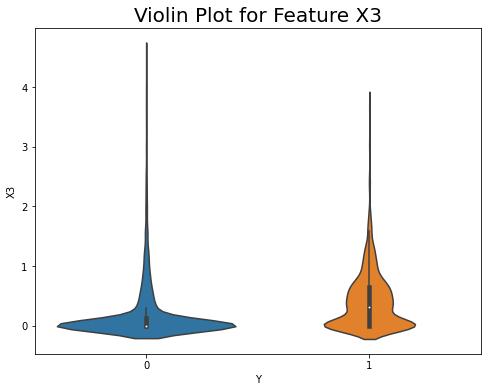

Basic Information about feature X3
Number of Zeros in X3 : 2289
Zero's Percentage in X3 : 58.54%
count    3910.000000
mean        0.284419
std         0.504352
min         0.000000
25%         0.000000
50%         0.000000
75%         0.430000
max         4.540000
Name: X3, dtype: float64


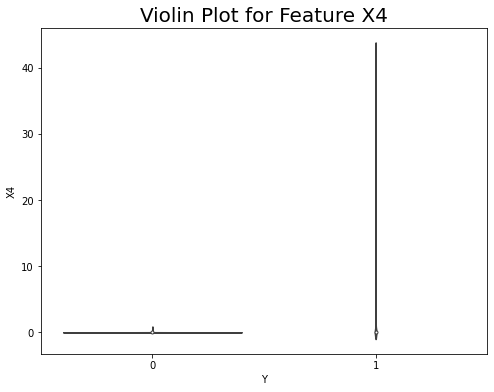

Basic Information about feature X4
Number of Zeros in X4 : 3871
Zero's Percentage in X4 : 99.0%
count    3910.000000
mean        0.062074
std         1.369361
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        42.810000
Name: X4, dtype: float64


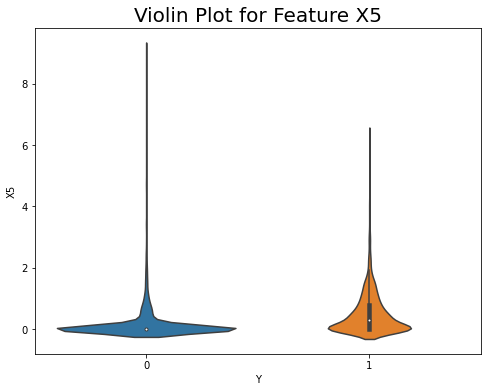

Basic Information about feature X5
Number of Zeros in X5 : 2414
Zero's Percentage in X5 : 61.74%
count    3910.000000
mean        0.311309
std         0.656195
min         0.000000
25%         0.000000
50%         0.000000
75%         0.387500
max         9.090000
Name: X5, dtype: float64


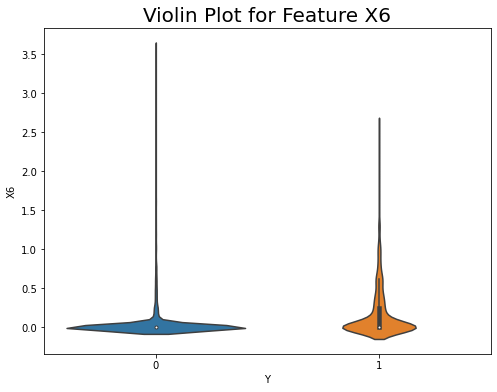

Basic Information about feature X6
Number of Zeros in X6 : 3050
Zero's Percentage in X6 : 78.01%
count    3910.000000
mean        0.095974
std         0.261455
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         3.570000
Name: X6, dtype: float64


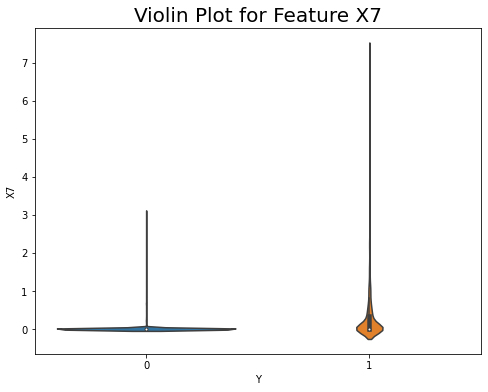

Basic Information about feature X7
Number of Zeros in X7 : 3226
Zero's Percentage in X7 : 82.51%
count    3910.000000
mean        0.112320
std         0.389516
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         7.270000
Name: X7, dtype: float64


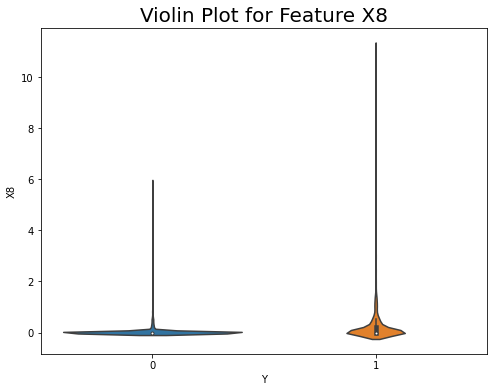

Basic Information about feature X8
Number of Zeros in X8 : 3195
Zero's Percentage in X8 : 81.71%
count    3910.000000
mean        0.106041
std         0.398694
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        11.110000
Name: X8, dtype: float64


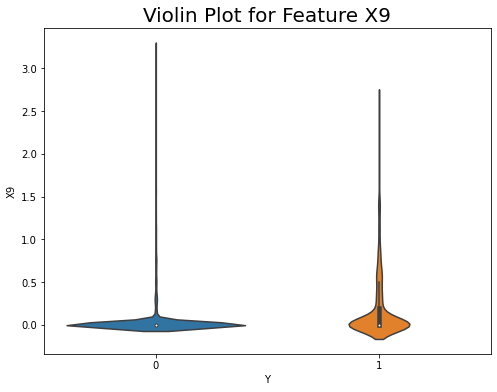

Basic Information about feature X9
Number of Zeros in X9 : 3247
Zero's Percentage in X9 : 83.04%
count    3910.000000
mean        0.091146
std         0.271417
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         3.230000
Name: X9, dtype: float64


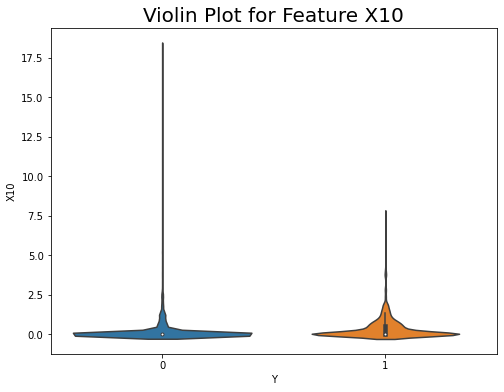

Basic Information about feature X10
Number of Zeros in X10 : 2804
Zero's Percentage in X10 : 71.71%
count    3910.000000
mean        0.244345
std         0.667065
min         0.000000
25%         0.000000
50%         0.000000
75%         0.170000
max        18.180000
Name: X10, dtype: float64


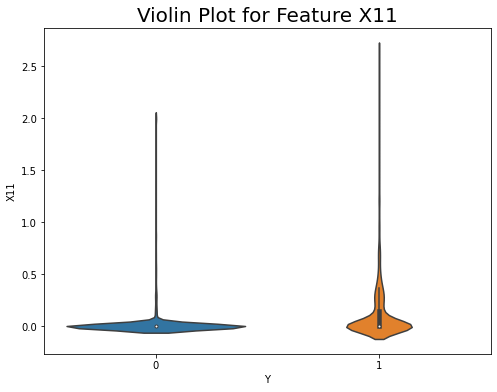

Basic Information about feature X11
Number of Zeros in X11 : 3302
Zero's Percentage in X11 : 84.45%
count    3910.000000
mean        0.060808
std         0.203018
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.610000
Name: X11, dtype: float64


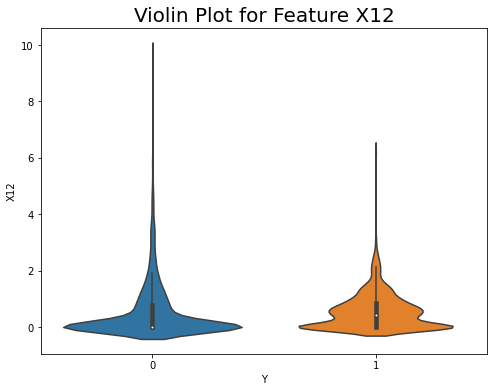

Basic Information about feature X12
Number of Zeros in X12 : 1915
Zero's Percentage in X12 : 48.98%
count    3910.000000
mean        0.553685
std         0.876412
min         0.000000
25%         0.000000
50%         0.140000
75%         0.820000
max         9.670000
Name: X12, dtype: float64


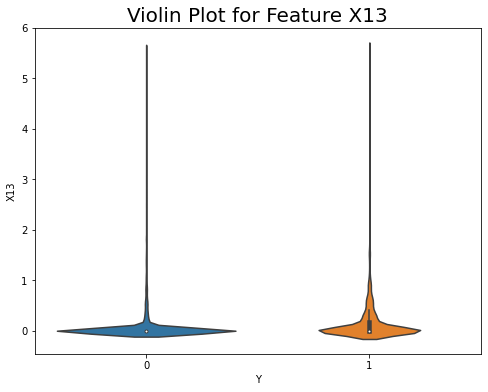

Basic Information about feature X13
Number of Zeros in X13 : 3183
Zero's Percentage in X13 : 81.41%
count    3910.000000
mean        0.094113
std         0.303433
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         5.550000
Name: X13, dtype: float64


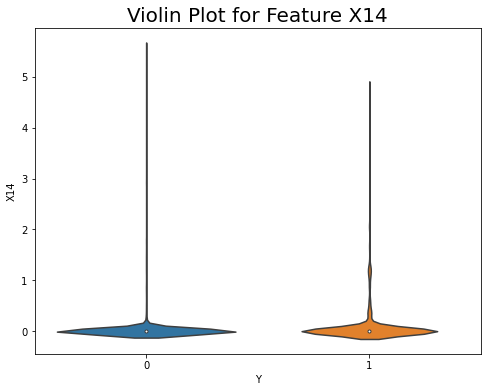

Basic Information about feature X14
Number of Zeros in X14 : 3603
Zero's Percentage in X14 : 92.15%
count    3910.000000
mean        0.057205
std         0.307892
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         5.550000
Name: X14, dtype: float64


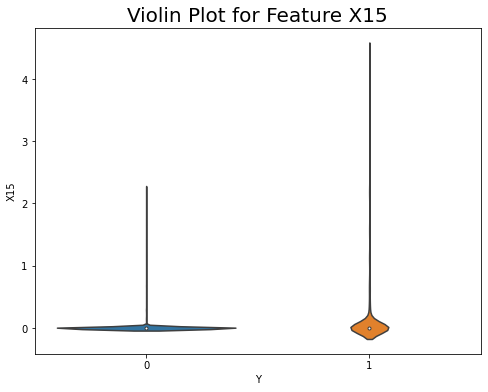

Basic Information about feature X15
Number of Zeros in X15 : 3628
Zero's Percentage in X15 : 92.79%
count    3910.000000
mean        0.048545
std         0.255293
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         4.410000
Name: X15, dtype: float64


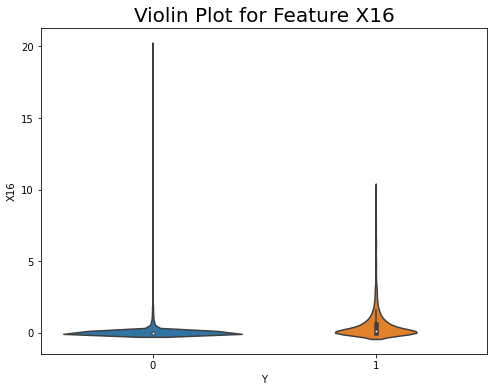

Basic Information about feature X16
Number of Zeros in X16 : 2849
Zero's Percentage in X16 : 72.86%
count    3910.000000
mean        0.246598
std         0.799327
min         0.000000
25%         0.000000
50%         0.000000
75%         0.110000
max        20.000000
Name: X16, dtype: float64


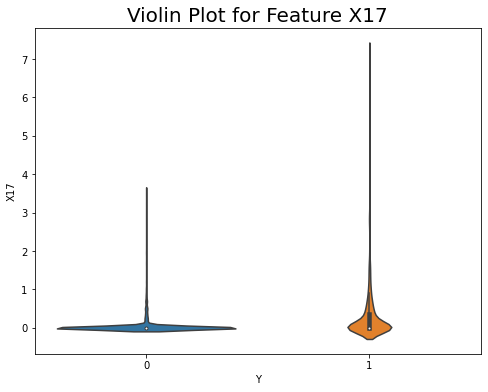

Basic Information about feature X17
Number of Zeros in X17 : 3086
Zero's Percentage in X17 : 78.93%
count    3910.000000
mean        0.142780
std         0.444164
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         7.140000
Name: X17, dtype: float64


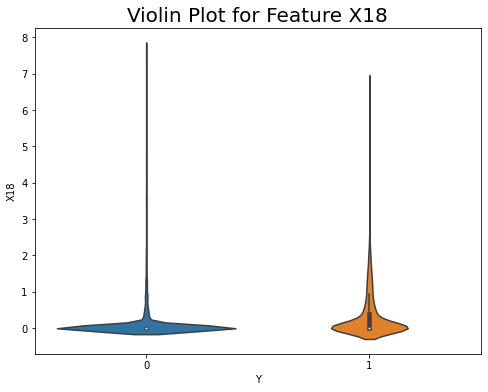

Basic Information about feature X18
Number of Zeros in X18 : 3026
Zero's Percentage in X18 : 77.39%
count    3910.000000
mean        0.185514
std         0.526497
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         7.690000
Name: X18, dtype: float64


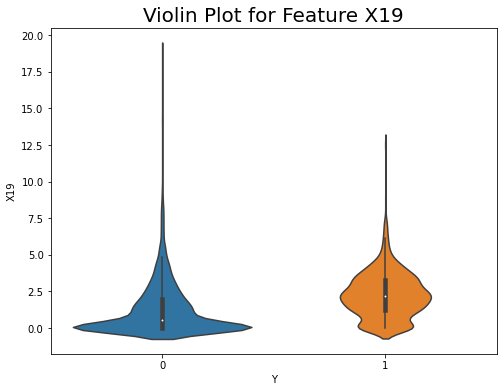

Basic Information about feature X19
Number of Zeros in X19 : 1152
Zero's Percentage in X19 : 29.46%
count    3910.000000
mean        1.660939
std         1.760214
min         0.000000
25%         0.000000
50%         1.310000
75%         2.637500
max        18.750000
Name: X19, dtype: float64


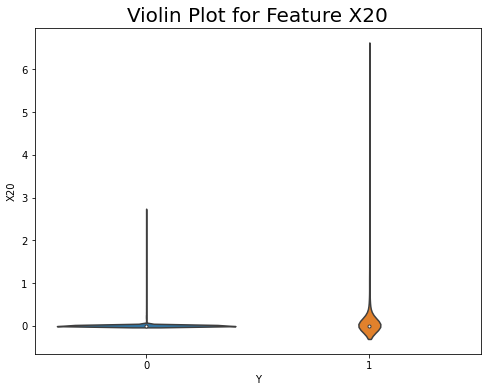

Basic Information about feature X20
Number of Zeros in X20 : 3546
Zero's Percentage in X20 : 90.69%
count    3910.000000
mean        0.083880
std         0.439199
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         6.320000
Name: X20, dtype: float64


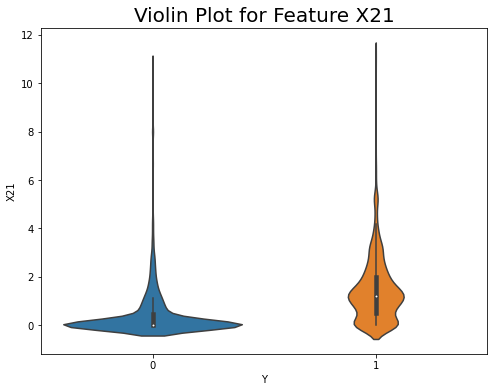

Basic Information about feature X21
Number of Zeros in X21 : 1848
Zero's Percentage in X21 : 47.26%
count    3910.000000
mean        0.818253
std         1.210078
min         0.000000
25%         0.000000
50%         0.235000
75%         1.270000
max        11.110000
Name: X21, dtype: float64


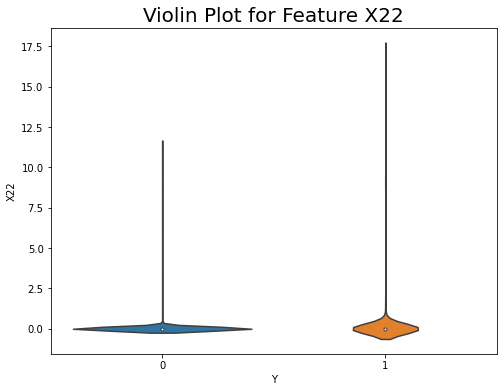

Basic Information about feature X22
Number of Zeros in X22 : 3821
Zero's Percentage in X22 : 97.72%
count    3910.000000
mean        0.112113
std         0.990195
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        17.100000
Name: X22, dtype: float64


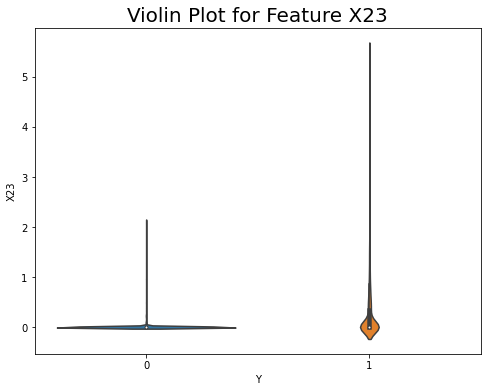

Basic Information about feature X23
Number of Zeros in X23 : 3330
Zero's Percentage in X23 : 85.17%
count    3910.000000
mean        0.101343
std         0.345887
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         5.450000
Name: X23, dtype: float64


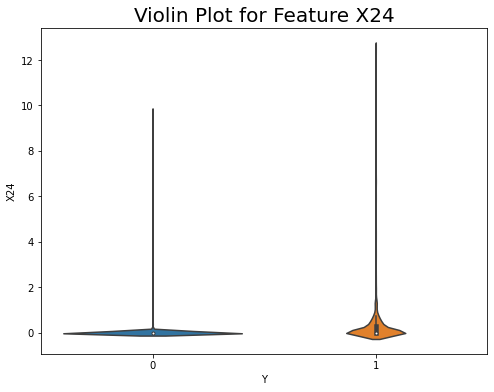

Basic Information about feature X24
Number of Zeros in X24 : 3280
Zero's Percentage in X24 : 83.89%
count    3910.000000
mean        0.095199
std         0.443482
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        12.500000
Name: X24, dtype: float64


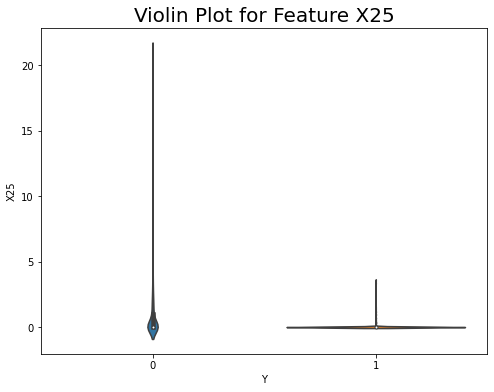

Basic Information about feature X25
Number of Zeros in X25 : 2978
Zero's Percentage in X25 : 76.16%
count    3910.000000
mean        0.565790
std         1.733593
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        20.830000
Name: X25, dtype: float64


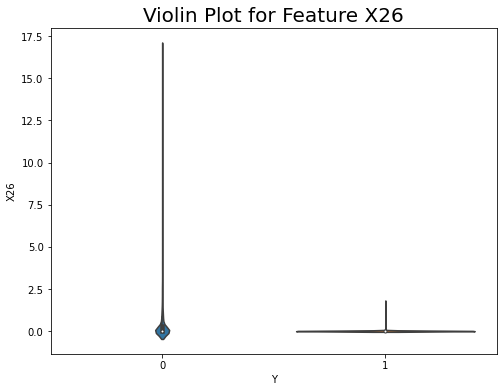

Basic Information about feature X26
Number of Zeros in X26 : 3218
Zero's Percentage in X26 : 82.3%
count    3910.000000
mean        0.266668
std         0.892676
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        16.660000
Name: X26, dtype: float64


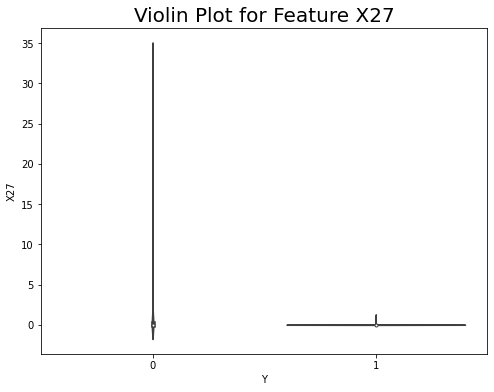

Basic Information about feature X27
Number of Zeros in X27 : 3238
Zero's Percentage in X27 : 82.81%
count    3910.000000
mean        0.757120
std         3.321562
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        33.330000
Name: X27, dtype: float64


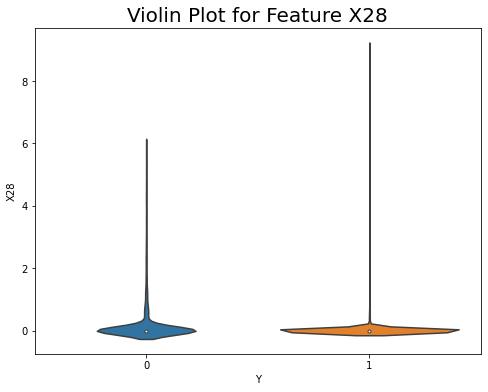

Basic Information about feature X28
Number of Zeros in X28 : 3520
Zero's Percentage in X28 : 90.03%
count    3910.000000
mean        0.125312
std         0.545827
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         9.090000
Name: X28, dtype: float64


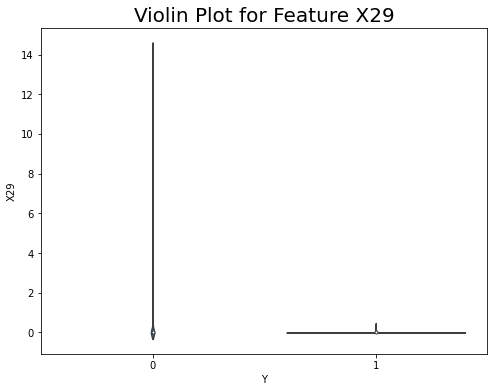

Basic Information about feature X29
Number of Zeros in X29 : 3595
Zero's Percentage in X29 : 91.94%
count    3910.000000
mean        0.100320
std         0.608313
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        14.280000
Name: X29, dtype: float64


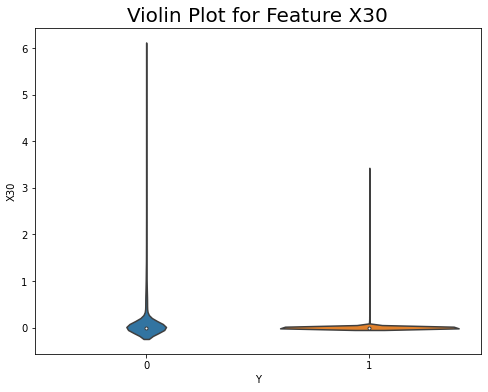

Basic Information about feature X30
Number of Zeros in X30 : 3511
Zero's Percentage in X30 : 89.8%
count    3910.000000
mean        0.105274
std         0.464483
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         5.880000
Name: X30, dtype: float64


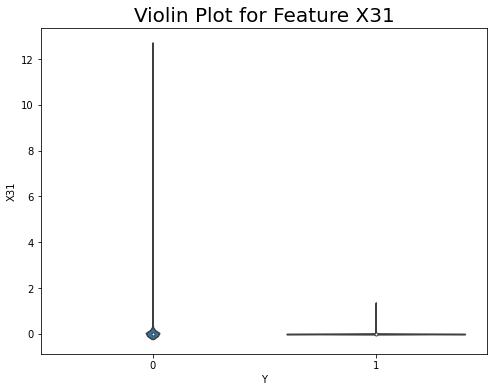

Basic Information about feature X31
Number of Zeros in X31 : 3661
Zero's Percentage in X31 : 93.63%
count    3910.000000
mean        0.065859
std         0.409316
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        12.500000
Name: X31, dtype: float64


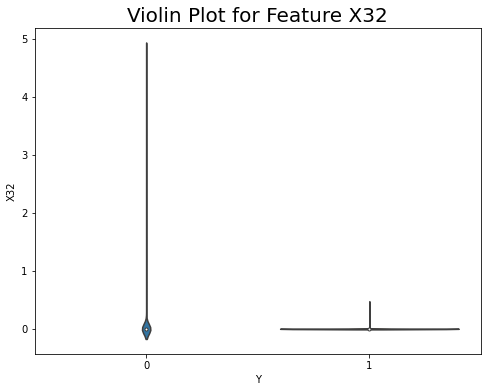

Basic Information about feature X32
Number of Zeros in X32 : 3734
Zero's Percentage in X32 : 95.5%
count    3910.000000
mean        0.046563
std         0.321900
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         4.760000
Name: X32, dtype: float64


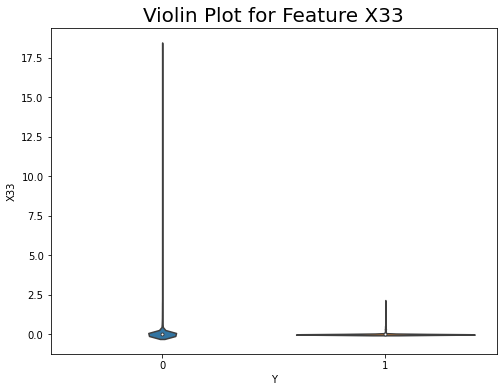

Basic Information about feature X33
Number of Zeros in X33 : 3565
Zero's Percentage in X33 : 91.18%
count    3910.000000
mean        0.094281
std         0.538145
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        18.180000
Name: X33, dtype: float64


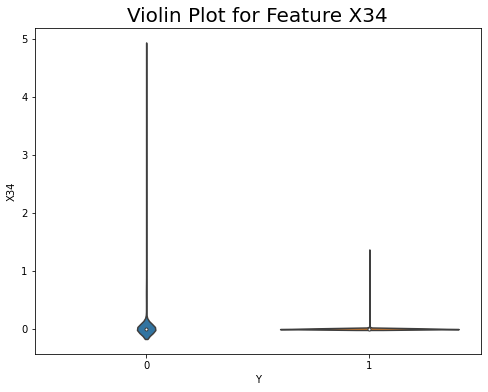

Basic Information about feature X34
Number of Zeros in X34 : 3726
Zero's Percentage in X34 : 95.29%
count    3910.000000
mean        0.047409
std         0.322958
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         4.760000
Name: X34, dtype: float64


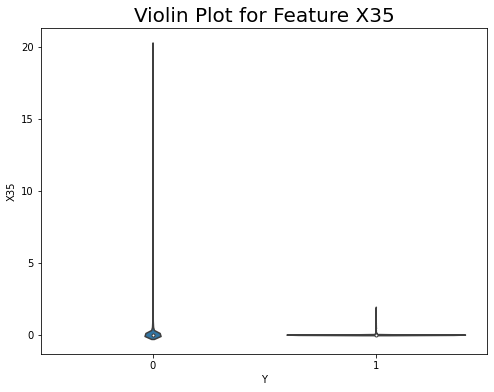

Basic Information about feature X35
Number of Zeros in X35 : 3496
Zero's Percentage in X35 : 89.41%
count    3910.000000
mean        0.108414
std         0.551546
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        20.000000
Name: X35, dtype: float64


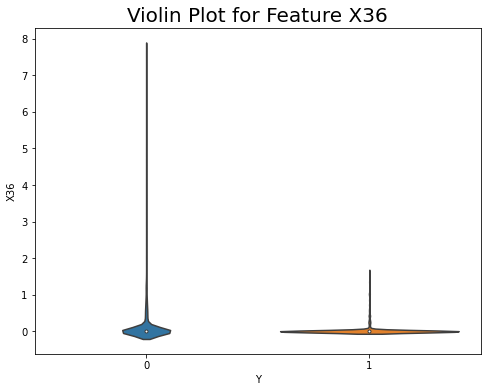

Basic Information about feature X36
Number of Zeros in X36 : 3412
Zero's Percentage in X36 : 87.26%
count    3910.000000
mean        0.094258
std         0.395220
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         7.690000
Name: X36, dtype: float64


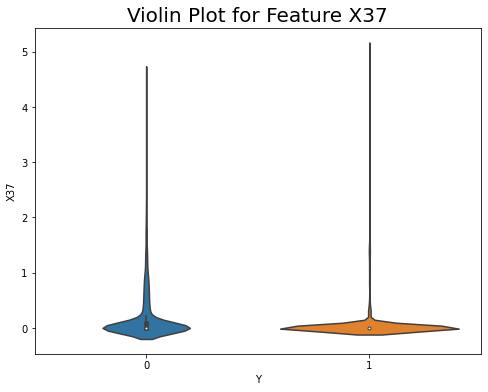

Basic Information about feature X37
Number of Zeros in X37 : 3210
Zero's Percentage in X37 : 82.1%
count    3910.000000
mean        0.134980
std         0.409085
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         5.050000
Name: X37, dtype: float64


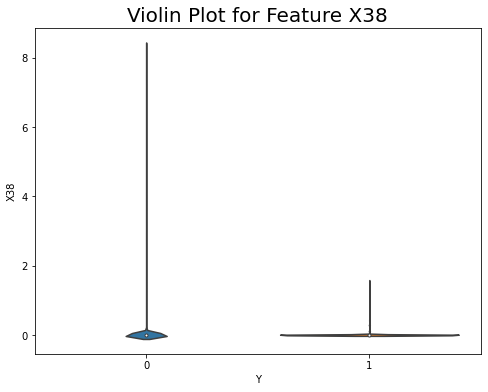

Basic Information about feature X38
Number of Zeros in X38 : 3836
Zero's Percentage in X38 : 98.11%
count    3910.000000
mean        0.013463
std         0.215280
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         8.330000
Name: X38, dtype: float64


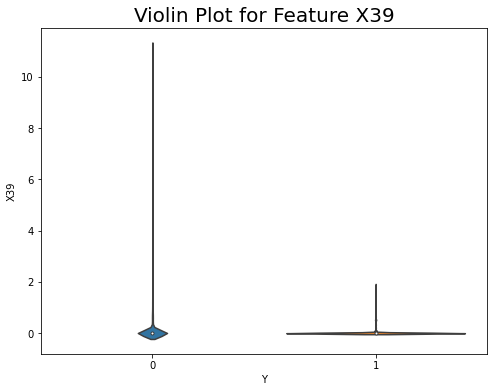

Basic Information about feature X39
Number of Zeros in X39 : 3574
Zero's Percentage in X39 : 91.41%
count    3910.000000
mean        0.080286
std         0.423936
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        11.110000
Name: X39, dtype: float64


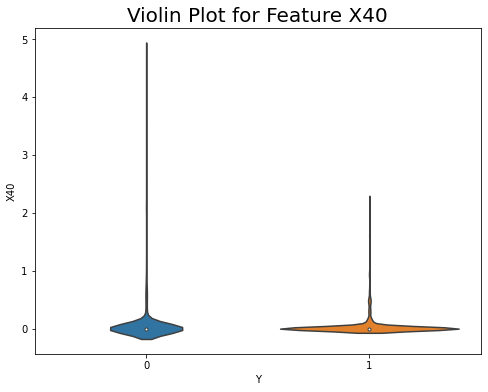

Basic Information about feature X40
Number of Zeros in X40 : 3523
Zero's Percentage in X40 : 90.1%
count    3910.000000
mean        0.065077
std         0.346739
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         4.760000
Name: X40, dtype: float64


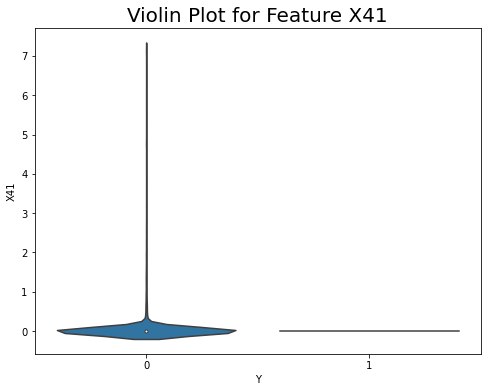

Basic Information about feature X41
Number of Zeros in X41 : 3784
Zero's Percentage in X41 : 96.78%
count    3910.000000
mean        0.044959
std         0.375329
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         7.140000
Name: X41, dtype: float64


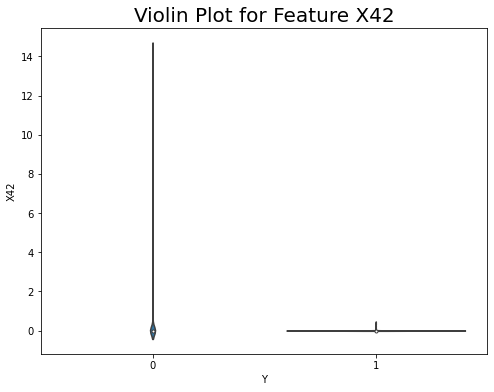

Basic Information about feature X42
Number of Zeros in X42 : 3619
Zero's Percentage in X42 : 92.56%
count    3910.000000
mean        0.139182
std         0.800478
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        14.280000
Name: X42, dtype: float64


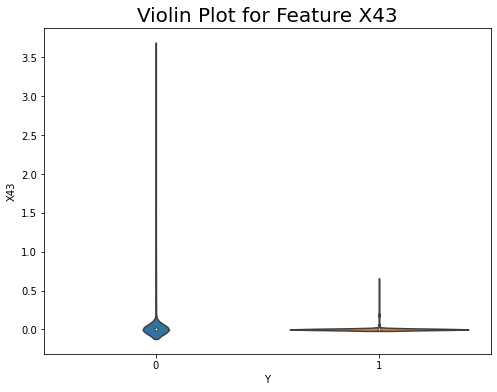

Basic Information about feature X43
Number of Zeros in X43 : 3591
Zero's Percentage in X43 : 91.84%
count    3910.000000
mean        0.047609
std         0.231074
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         3.570000
Name: X43, dtype: float64


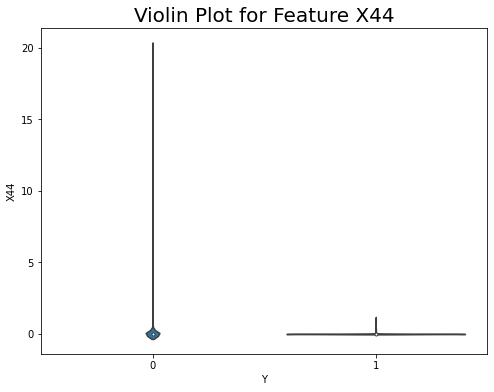

Basic Information about feature X44
Number of Zeros in X44 : 3626
Zero's Percentage in X44 : 92.74%
count    3910.000000
mean        0.081987
std         0.652636
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        20.000000
Name: X44, dtype: float64


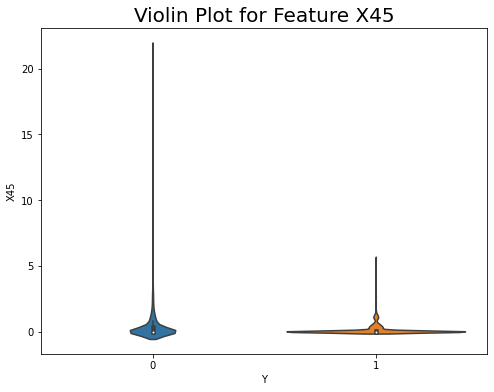

Basic Information about feature X45
Number of Zeros in X45 : 2794
Zero's Percentage in X45 : 71.46%
count    3910.000000
mean        0.313151
std         1.063868
min         0.000000
25%         0.000000
50%         0.000000
75%         0.120000
max        21.420000
Name: X45, dtype: float64


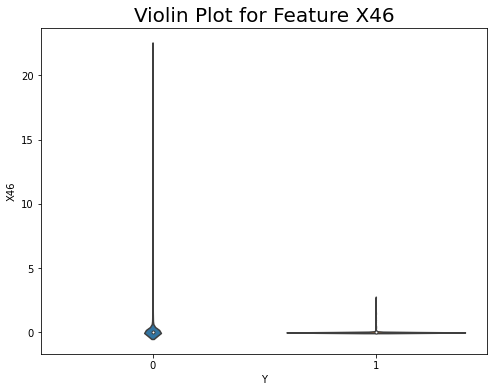

Basic Information about feature X46
Number of Zeros in X46 : 3483
Zero's Percentage in X46 : 89.08%
count    3910.000000
mean        0.182662
std         0.944817
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        22.050000
Name: X46, dtype: float64


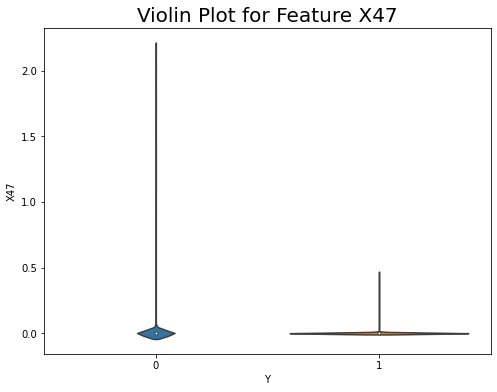

Basic Information about feature X47
Number of Zeros in X47 : 3854
Zero's Percentage in X47 : 98.57%
count    3910.000000
mean        0.006054
std         0.081662
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.170000
Name: X47, dtype: float64


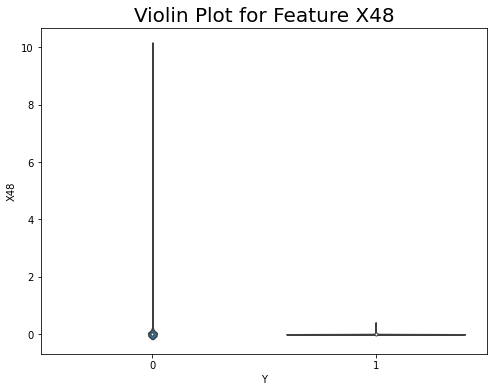

Basic Information about feature X48
Number of Zeros in X48 : 3738
Zero's Percentage in X48 : 95.6%
count    3910.000000
mean        0.033281
std         0.301611
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        10.000000
Name: X48, dtype: float64


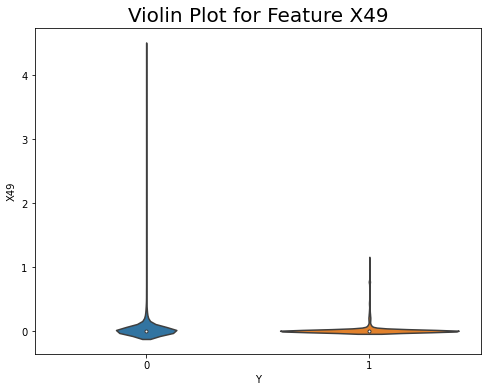

Basic Information about feature X49
Number of Zeros in X49 : 3239
Zero's Percentage in X49 : 82.84%
count    3910.000000
mean        0.037493
std         0.235054
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         4.385000
Name: X49, dtype: float64


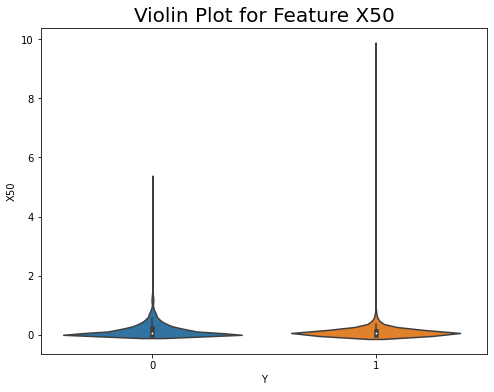

Basic Information about feature X50
Number of Zeros in X50 : 1590
Zero's Percentage in X50 : 40.66%
count    3910.000000
mean        0.139252
std         0.276309
min         0.000000
25%         0.000000
50%         0.066000
75%         0.188000
max         9.752000
Name: X50, dtype: float64


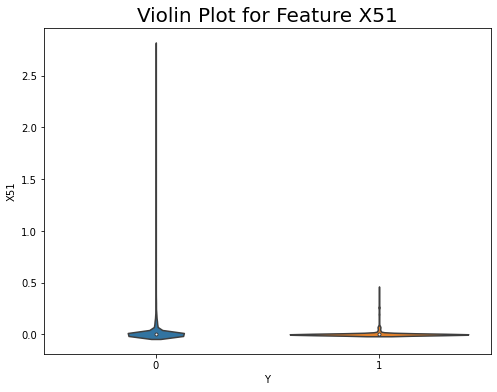

Basic Information about feature X51
Number of Zeros in X51 : 3453
Zero's Percentage in X51 : 88.31%
count    3910.000000
mean        0.015876
std         0.083600
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.777000
Name: X51, dtype: float64


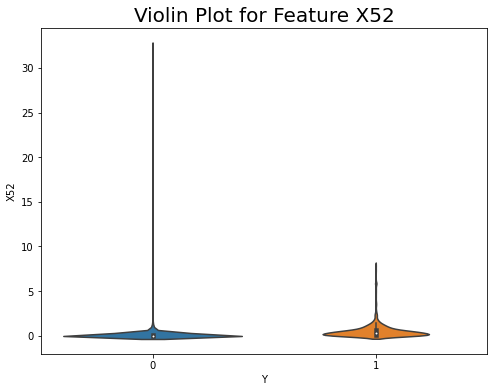

Basic Information about feature X52
Number of Zeros in X52 : 1999
Zero's Percentage in X52 : 51.13%
count    3910.000000
mean        0.272971
std         0.858634
min         0.000000
25%         0.000000
50%         0.000000
75%         0.317250
max        32.478000
Name: X52, dtype: float64


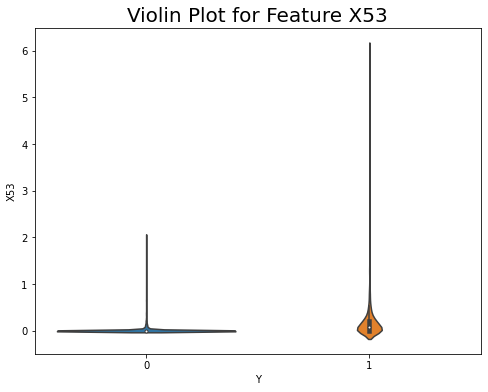

Basic Information about feature X53
Number of Zeros in X53 : 2713
Zero's Percentage in X53 : 69.39%
count    3910.000000
mean        0.077820
std         0.256991
min         0.000000
25%         0.000000
50%         0.000000
75%         0.054000
max         6.003000
Name: X53, dtype: float64


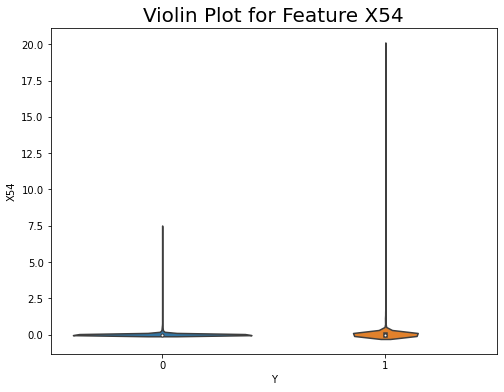

Basic Information about feature X54
Number of Zeros in X54 : 3267
Zero's Percentage in X54 : 83.55%
count    3910.000000
mean        0.043828
std         0.452862
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        19.829000
Name: X54, dtype: float64


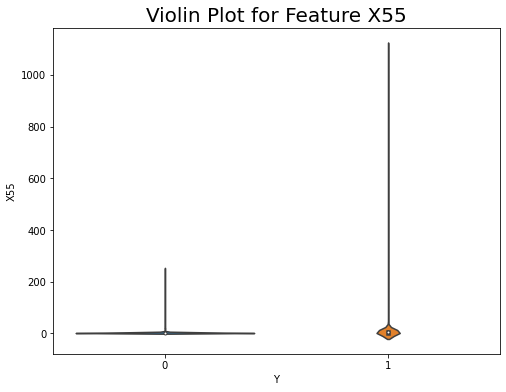

Basic Information about feature X55
Number of Zeros in X55 : 0
Zero's Percentage in X55 : 0%
count    3910.000000
mean        5.047150
std        31.397035
min         1.000000
25%         1.580750
50%         2.263500
75%         3.714000
max      1102.500000
Name: X55, dtype: float64


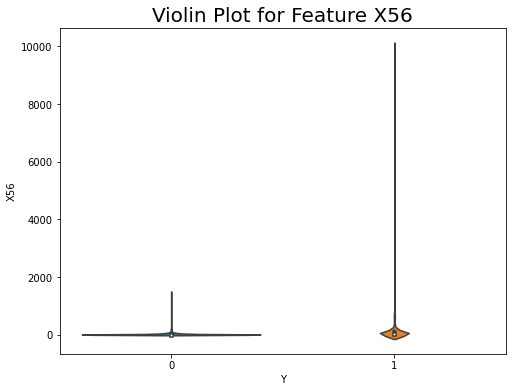

Basic Information about feature X56
Number of Zeros in X56 : 0
Zero's Percentage in X56 : 0%
count    3910.000000
mean       52.338107
std       204.445218
min         1.000000
25%         6.000000
50%        15.000000
75%        43.000000
max      9989.000000
Name: X56, dtype: float64


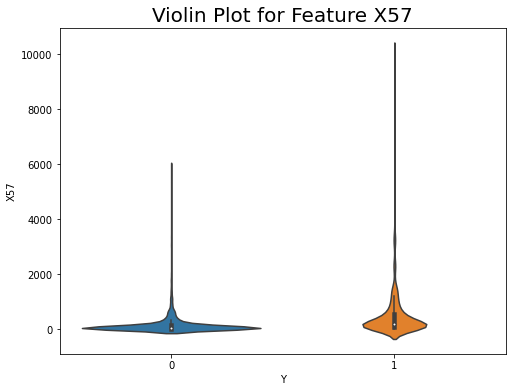

Basic Information about feature X57
Number of Zeros in X57 : 0
Zero's Percentage in X57 : 0%
count     3910.000000
mean       283.059079
std        578.339858
min          1.000000
25%         35.000000
50%         94.000000
75%        264.000000
max      10062.000000
Name: X57, dtype: float64


In [ ]:
i=1
while(i<58):
  figure(figsize=(8,6))
  sns.violinplot(x=y, y='X'+str(i), data=df, size=10)
  plt.title('Violin Plot for Feature X'+str(i),fontsize=20)
  plt.show()
  print("Basic Information about feature X"+str(i))
  try:
    print('Number of Zeros in X{} : {}'.format(i,df['X'+str(i)].value_counts()[0]))
    print('Zero\'s Percentage in X{} : {}%'.format(i,np.round(df['X'+str(i)].value_counts()[0]/df.shape[0]*100,2)))
  except KeyError:
    print('Number of Zeros in X{} : {}'.format(i,0))
    print('Zero\'s Percentage in X{} : {}%'.format(i,0))
  print(df['X'+str(i)].describe())
  print('='*140)
  i+=1

### TSNE

In [ ]:
ss = StandardScaler()
df1 = ss.fit_transform(df)
print(f'standard scaling done')

standard scaling done


In [ ]:
# program for plotting tsne
def plottsne(data,y,per,iter):
  X_embedded = TSNE(n_components=2, perplexity=per,  n_iter=iter, learning_rate='auto',init='random',random_state=0).fit_transform(data)
  tsne_data = np.vstack((X_embedded.T, y)).T
  tsne = pd.DataFrame(data=tsne_data, columns=("D1", "D2", "label"))
  title = 'TSNE Plot of '+ str(per) + ' perplexity & ' + str(iter) + ' iterations '
  sns.FacetGrid(tsne, hue="label", height=5).map(plt.scatter, 'D1', 'D2').add_legend()    
  plt.title(title,size=10)
  plt.show()

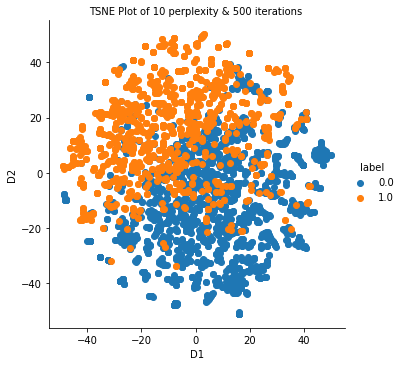

In [ ]:
plottsne(df1,y,10,500)

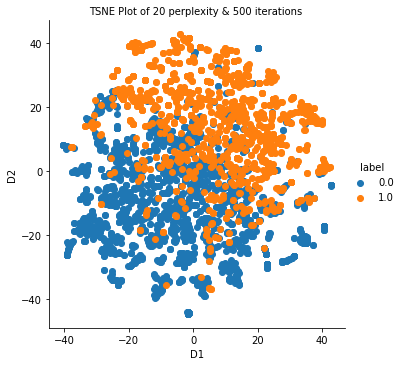

In [ ]:
plottsne(df1,y,20,500)

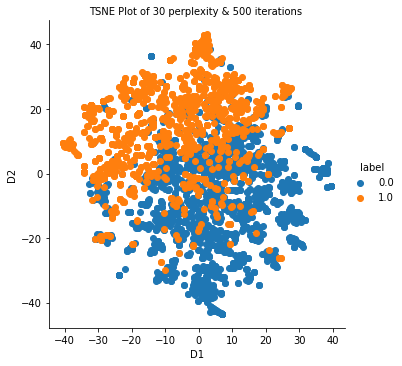

In [ ]:
plottsne(df1,y,30,500)

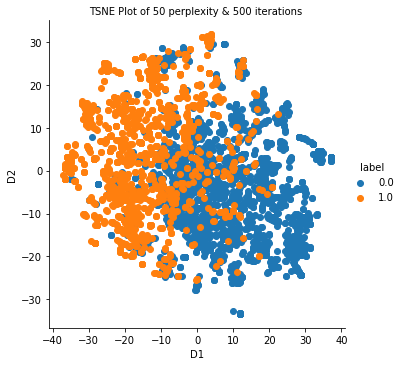

In [ ]:
plottsne(df1,y,50,500)

**Observations**:
We have checked using perplexity of 10, 20, 30 and 50 and the structure of graph is stable.
From the graph we can say that the data is very much seperable in higher dimension.

##Feature Selection

We will use three method for Feature Selection:

*   Correaltion Matrix
*   Mutal information
*   Random Forest





###Train-Test Split

In [ ]:
#Loading Dataset using pandas
                         
df = pd.read_csv('training_set.csv', index_col=0)       

# Sepearating Dependent Variable from the Dataset

y = df.Y                                                
df.drop(['Y'], axis=1, inplace=True)

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(df, y, test_size = 0.2)

### Correlation


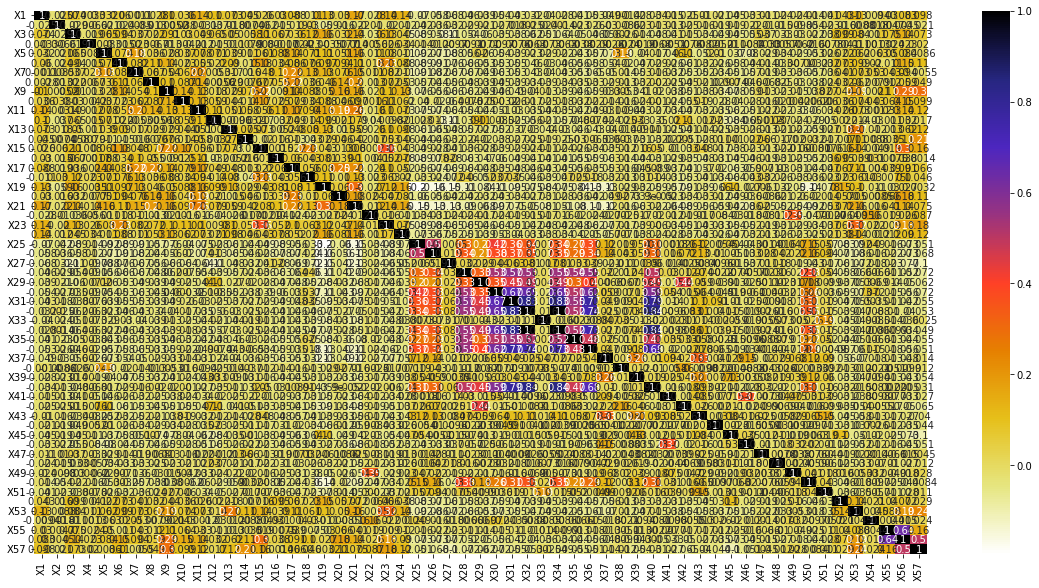

In [ ]:
cor = x_train.corr()
figure(figsize=(20,10))
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
def correlation(data, threshold):
  col_corr = set()   
  corr_matrix = data.corr()
  for i in range(len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j])>threshold:
        col_name = corr_matrix.columns[i]
        col_corr.add(col_name)
  return col_corr

In [ ]:
corr_features = correlation(x_train, 0.5)
len(corr_features)

8

In [ ]:
corr_features

{'X30', 'X31', 'X32', 'X34', 'X35', 'X36', 'X40', 'X56'}

In [ ]:
x_train1 = x_train.drop(corr_features, axis=1)
x_val1 = x_val.drop(corr_features, axis=1)
x_test1 = test.drop(corr_features, axis=1)
print(x_train1.shape)
print(x_val1.shape)
print(x_test1.shape)

(3128, 49)
(782, 49)
(691, 49)


###Mutual Information

In [ ]:
x_train.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57
3180,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.00,20.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,2.000,5,8
2779,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,16.66,0.0,0.0,0.0,0.0,0.000,0.0,8.333,0.0,0.000,2.000,3,8
2152,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,1.21,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,1.21,0.0,0.0,1.21,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.000,1.166,2,21
2937,0.0,0.00,0.24,0.0,0.49,0.0,0.0,0.00,0.24,0.0,0.0,0.00,0.0,1.49,0.0,0.0,0.24,0.0,0.00,0.0,0.74,0.0,0.0,0.0,0.49,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.24,0.0,0.00,0.0,0.0,2.23,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.046,0.0,0.069,0.0,0.255,2.776,121,622
3630,0.0,0.17,0.00,0.0,0.17,0.0,0.0,0.35,0.00,0.0,0.0,0.88,0.0,0.00,0.0,0.0,1.95,0.0,0.17,0.0,0.00,0.0,0.0,0.0,0.35,0.17,0.0,0.0,0.0,0.17,0.0,0.0,0.0,0.0,0.0,0.35,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.53,0.0,0.0,0.0,0.0,0.256,0.0,0.000,0.0,0.000,2.053,13,232


In [ ]:
x_train.shape

(3128, 57)

In [ ]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(x_train, y_train)
mutual_info

array([0.04233855, 0.07016075, 0.07253591, 0.00903841, 0.09339445,
       0.06260258, 0.15144248, 0.08903611, 0.05145684, 0.07666338,
       0.08208666, 0.07429259, 0.02946032, 0.01476721, 0.0426991 ,
       0.13099009, 0.08262844, 0.04831277, 0.13189367, 0.05903945,
       0.16845409, 0.02683545, 0.11587909, 0.12745879, 0.12397554,
       0.07845605, 0.08181073, 0.04390817, 0.04003154, 0.02727244,
       0.03395949, 0.01439967, 0.02416962, 0.00859267, 0.03661104,
       0.01455495, 0.0517032 , 0.01492133, 0.01533711, 0.00348456,
       0.02113816, 0.02810633, 0.02153156, 0.03333704, 0.04622338,
       0.02967277, 0.00296808, 0.02255415, 0.01856781, 0.05087041,
       0.01493815, 0.2015502 , 0.18494403, 0.04099958, 0.18276291,
       0.20005792, 0.15267139])

In [ ]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = x_train.columns
mutual_info.sort_values(ascending=False)

X52    0.201550
X56    0.200058
X53    0.184944
X55    0.182763
X21    0.168454
X57    0.152671
X7     0.151442
X19    0.131894
X16    0.130990
X24    0.127459
X25    0.123976
X23    0.115879
X5     0.093394
X8     0.089036
X17    0.082628
X11    0.082087
X27    0.081811
X26    0.078456
X10    0.076663
X12    0.074293
X3     0.072536
X2     0.070161
X6     0.062603
X20    0.059039
X37    0.051703
X9     0.051457
X50    0.050870
X18    0.048313
X45    0.046223
X28    0.043908
X15    0.042699
X1     0.042339
X54    0.041000
X29    0.040032
X35    0.036611
X31    0.033959
X44    0.033337
X46    0.029673
X13    0.029460
X42    0.028106
X30    0.027272
X22    0.026835
X33    0.024170
X48    0.022554
X43    0.021532
X41    0.021138
X49    0.018568
X39    0.015337
X51    0.014938
X38    0.014921
X14    0.014767
X36    0.014555
X32    0.014400
X4     0.009038
X34    0.008593
X40    0.003485
X47    0.002968
dtype: float64

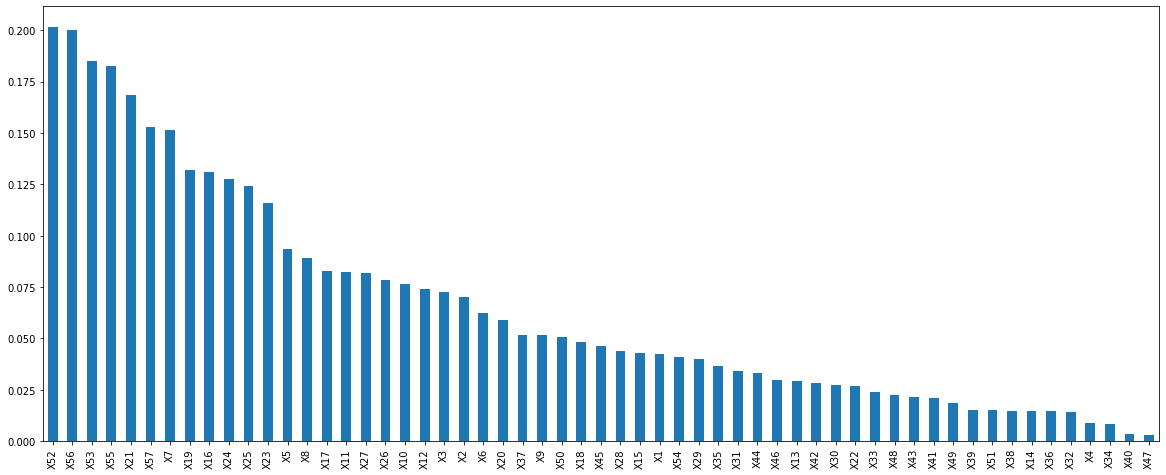

In [ ]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))
plt.show()

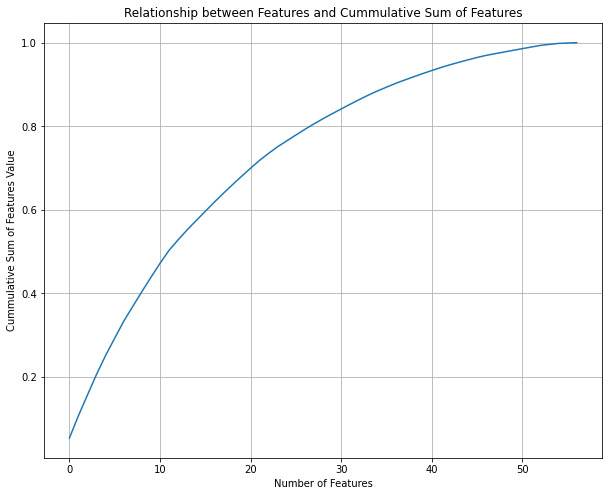

In [ ]:
a=np.cumsum(mutual_info.sort_values(ascending=False))
b = a/max(a)
figure(figsize=(10,8))
plt.plot(range(57), b)
plt.title('Relationship between Features and Cummulative Sum of Features')
plt.grid()
plt.xlabel('Number of Features')
plt.ylabel('Cummulative Sum of Features Value')
plt.show()

In [ ]:
fs = SelectKBest(score_func=mutual_info_classif, k=40)
# learn relationship from training data
fs.fit(x_train, y_train)
# transform train input data
x_train2 = fs.transform(x_train)
# transform test input data
x_val2 = fs.transform(x_val)
x_test2 = fs.transform(test)
print(x_train2.shape)
print(x_val2.shape)
print(x_test2.shape)

(3128, 40)
(782, 40)
(691, 40)


### Feature Selection using RandomForest

In [ ]:
# Feature Selection using RandomForest
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(100, max_depth=None, n_jobs=-1)
clf.fit(x_train,y_train)
feature_importance = clf.feature_importances_
feature_importance

array([0.00342701, 0.00513095, 0.01376908, 0.00102614, 0.02946453,
       0.00958848, 0.06205906, 0.02053537, 0.00544645, 0.00755779,
       0.00756185, 0.012747  , 0.00367815, 0.00227965, 0.00257333,
       0.05383924, 0.01487351, 0.00908712, 0.03046894, 0.00362296,
       0.07028234, 0.00217115, 0.03261841, 0.03281991, 0.04658988,
       0.01934655, 0.0197407 , 0.00531162, 0.00165916, 0.00327334,
       0.00160157, 0.00065018, 0.0022232 , 0.00042637, 0.00319778,
       0.00361191, 0.01254386, 0.00072988, 0.00346868, 0.00100742,
       0.0011448 , 0.00723943, 0.00112147, 0.00158206, 0.00994361,
       0.01746947, 0.00038374, 0.00141057, 0.00490508, 0.01159309,
       0.00356546, 0.11334365, 0.09785088, 0.0040596 , 0.06572177,
       0.05776639, 0.03888846])

In [ ]:
feature_importance = pd.Series(feature_importance)
feature_importance.index = x_train.columns
feature_importance.sort_values(ascending=False)

X52    0.113344
X53    0.097851
X21    0.070282
X55    0.065722
X7     0.062059
X56    0.057766
X16    0.053839
X25    0.046590
X57    0.038888
X24    0.032820
X23    0.032618
X19    0.030469
X5     0.029465
X8     0.020535
X27    0.019741
X26    0.019347
X46    0.017469
X17    0.014874
X3     0.013769
X12    0.012747
X37    0.012544
X50    0.011593
X45    0.009944
X6     0.009588
X18    0.009087
X11    0.007562
X10    0.007558
X42    0.007239
X9     0.005446
X28    0.005312
X2     0.005131
X49    0.004905
X54    0.004060
X13    0.003678
X20    0.003623
X36    0.003612
X51    0.003565
X39    0.003469
X1     0.003427
X30    0.003273
X35    0.003198
X15    0.002573
X14    0.002280
X33    0.002223
X22    0.002171
X29    0.001659
X31    0.001602
X44    0.001582
X48    0.001411
X41    0.001145
X43    0.001121
X4     0.001026
X40    0.001007
X38    0.000730
X32    0.000650
X34    0.000426
X47    0.000384
dtype: float64

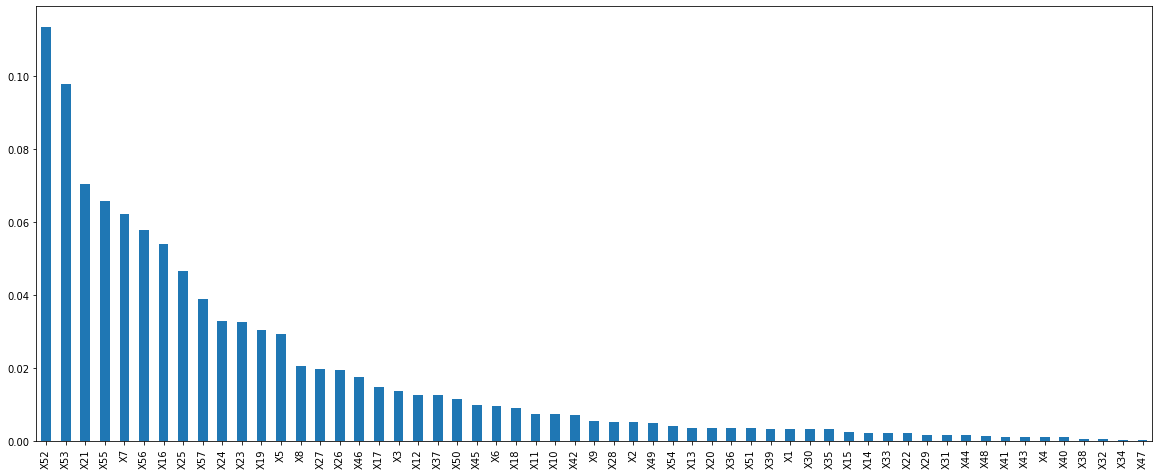

In [ ]:
feature_importance.sort_values(ascending=False).plot.bar(figsize=(20, 8))
plt.show()

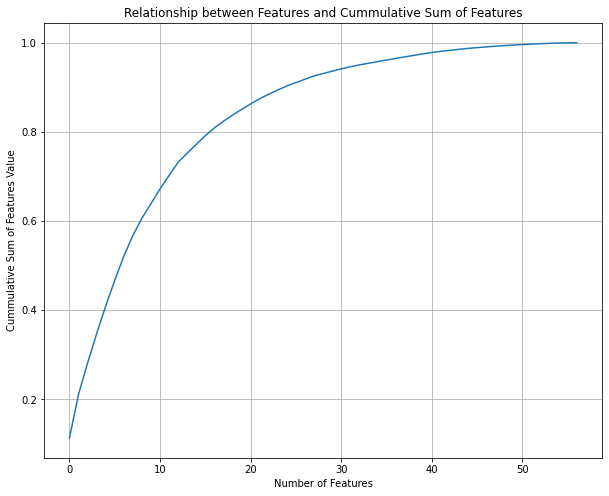

In [ ]:
a=np.cumsum(sorted(feature_importance, reverse=True))
b = a/max(a)
figure(figsize=(10,8))
plt.plot(range(57), b)
plt.title('Relationship between Features and Cummulative Sum of Features')
plt.grid()
plt.xlabel('Number of Features')
plt.ylabel('Cummulative Sum of Features Value')
plt.show()

In [ ]:
# Ranking the features with their respect to feature importances
features = sorted(zip(df.columns,feature_importance),key=lambda x: x[1], reverse=True)
top_features = [x[0] for x in features[:40]]

In [ ]:
# Selecting the top features from data
x_train3 = x_train[top_features]
x_val3 = x_val[top_features]
x_test3 = test[top_features]
print(x_train3.shape)
print(x_val3.shape)
print(x_test3.shape)

(3128, 40)
(782, 40)
(691, 40)


## Preprocessing

Since we have only Numerical Data so we have done Standard Scaling

In [ ]:
def preprocess(x_train, x_val, x_test):
  """This function is to preprocess numerical data"""

  from sklearn.preprocessing import StandardScaler
  ss = StandardScaler()
  ss.fit(x_train)
  X_train = ss.transform(x_train)
  X_val = ss.transform(x_val)
  X_test = ss.fit_transform(x_test)
  print(X_train.shape)
  print(X_val.shape)
  print(X_test.shape)
  print(f'standard scaling done')
  return X_train, X_val, X_test

In [ ]:
X_train, X_val, X_test = preprocess(x_train, x_val, test)

(3128, 57)
(782, 57)
(691, 57)
standard scaling done


In [ ]:
X_train1, X_val1, X_test1 = preprocess(x_train1, x_val1, x_test1)

(3128, 49)
(782, 49)
(691, 49)
standard scaling done


In [ ]:
X_train2, X_val2, X_test2 = preprocess(x_train2, x_val2, x_test2)

(3128, 40)
(782, 40)
(691, 40)
standard scaling done


In [ ]:
X_train3, X_val3, X_test3 = preprocess(x_train3, x_val3, x_test3)

(3128, 40)
(782, 40)
(691, 40)
standard scaling done
